In [1]:
import warnings
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import imblearn.over_sampling

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import average_precision_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
# from sklearn.metrics import precision_recall_curve

In [4]:
# from notebook_pbar import * # import my notebook_pbar.py file
# timelist = timelist # import the default variables timelist and then_time
# then_time = then_time

In [5]:
# function cm_val creates an interactive confusion matrix on un-scaled data.
# function cm_val_scaled creates an interactive confusion matrix on scaled data.
from my_functions import cm_val
from my_functions import cm_val_scaled
# function y_pred_inverse extracts the predictive probability from predict_proba.
from my_functions import y_pred_inverse
# function plot_validation_curve_log plots a validation curve on a log scale.
# function plot_validation_curve_reg plots a validation curve on a default scale.
from my_functions import plot_validation_curve_log
from my_functions import plot_validation_curve_reg
# function plot_learning_curve_reg plots a learning curve on a default scale.
from my_functions import plot_learning_curve
# function plot_decision_tree uses graphviz to visualize the splits of a devision tree.
from my_functions import plot_decision_tree
# function train_and_calibrate_cv performs stratified shuffle split on a specified model,
# returning validation scores and roc/auc.
from my_functions import train_and_calibrate_cv

In [6]:
warnings.filterwarnings('ignore')

In [7]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [8]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
np.random.seed(42)

In [10]:
df = pd.read_pickle('pickle/df_modeling.pkl')

In [11]:
len(df)

8866

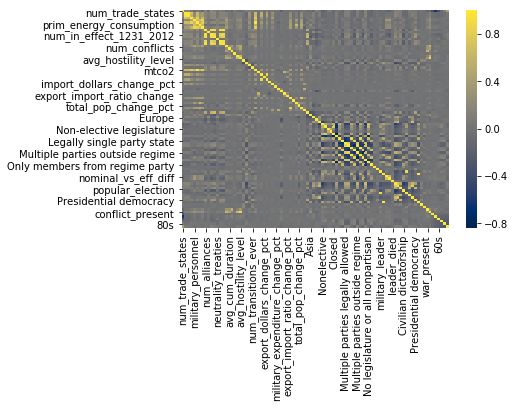

In [12]:
sns.heatmap(df.drop(['year', 'cow_code', 'mtco2_change_pct'], axis = 1).corr(), cmap = 'cividis');

In [13]:
df.head()

,cow_code,state_name,year,num_trade_states,export_dollars,import_dollars,military_expenditure,military_personnel,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,num_conflicts,avg_cum_duration,num_wars,ongoing_2010,revision_pct,avg_hostility_level,num_leadership_changes,leader_tenure,age_govt,num_transitions_ever,mtco2,export_import_ratio,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,military_expenditure_change,military_expenditure_change_pct,military_personnel_change,military_personnel_change_pct,export_import_ratio_change,export_import_ratio_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,mtco2_change,mtco2_change_pct,cinc_score_change,Americas,Asia,Europe,Oceania,Indirect election,Nonelective,No legislature exists,Non‐elective legislature,Appointed,Closed,Elected,All parties legally banned,Legally single party state,Multiple parties legally allowed,Multiple parties,No parties,One party,Multiple parties outside regime,No parties outside regime,One party outside regime,Legislature with multiple parties,No legislature or all nonpartisan,Only members from regime party,Rules rewritten unconstitutionally,collective_leadership,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,Civilian dictatorship,Military dictatorship,Mixed (semi‐presidential) democracy,Parliamentary democracy,Presidential democracy,Royal dictatorship,transition_to_democracy,transition_to_dictatorship,war_present,conflict_present,40s,50s,60s,70s,80s,90s
0,2,United States of America,1947,67.000,76000000.000,11343750000.000,14315999000.000,1583000.000,2631554000000.000,144126000.000,0.310,39.000,0.000,19.000,39.000,0.000,20.000,39.000,0.000,0.000,0.000,0.000,0.000,1.000,0,3,78.000,0,2480.766,0.007,-84000000.000,0.475,0.000,1.000,-30817985000.000,0.317,-1447000.000,0.522,-0.007,0.475,255266000000.000,1.107,2737000.000,1.019,227.736,1.101,-0.054,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,390,Denmark,1947,67.000,616200000.000,484590000.000,59412000.000,14000.000,17814000000.000,4150000.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,47.000,0,21.456,1.272,0.000,1.000,0.000,1.000,7023000.000,1.134,0.000,1.000,0.000,1.000,3422000000.000,1.238,50000.000,1.012,3.811,1.216,0.000,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,94,Costa Rica,1947,67.000,39700000.000,35990000.000,1411000.000,1000.000,38000000.000,730000.000,0.000,39.000,0.000,19.000,39.000,0.000,20.000,39.000,0.000,0.000,0.000,0.000,0.000,1.000,0,4,29.000,1,0.286,1.103,0.000,1.000,0.000,1.000,237000.000,1.202,0.000,1.000,0.000,1.000,2000000.000,1.056,20000.000,1.028,0.000,1.000,-0.000,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,395,Iceland,1947,67.000,67200000.000,42760000.000,7593960.688,0.000,28000000.000,134000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,1,4.000,0,0.004,1.572,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,4000000.000,1.167,2000.000,1.015,-0.007,0.336,-0.000,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,93,Nicaragua,1947,67.000,25080000.000,17820000.000,7037000.000,3000.000,18000000.000,977000.000,0.000,39.000,0.000,19.000,39.000,0.000,20.000,39.000,0.000,0.000,0.000,0.000,0.000,1.000,0,11,11.000,0,0.007,1.407,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,28000.000,1.030,0.004,1.973,-0.000,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [14]:
df.drop(['cow_code', 'year', 'state_name', 'export_import_ratio', 'avg_hostility_level',
         'military_expenditure', 'military_personnel', 'num_wars', 'num_conflicts',
         'war_present', 'revision_pct', 'avg_cum_duration', 'num_trade_states',
         'export_dollars', 'import_dollars', 'prim_energy_consumption',
         'total_pop', 'cinc_score', 'export_dollars_change', 'export_dollars_change_pct',
         'import_dollars_change', 'import_dollars_change_pct', 'num_alliances',
         'pre_1816_alliances', 'num_in_effect_1231_2012', 'defense_treaties',
         'neutrality_treaties', 'nonaggression_treaties', 'entente_treaties',
         'leader_tenure', 'age_govt', 'num_transitions_ever',
         'num_leadership_changes', 'military_expenditure_change',
         'military_expenditure_change_pct', 'military_personnel_change',
         'military_personnel_change_pct', 'export_import_ratio_change',
         'export_import_ratio_change_pct', 'prim_energy_consumption_change',
         'prim_energy_consumption_change_pct', 'cinc_score_change',
         'total_pop_change', 'total_pop_change_pct', 'mtco2',
         'mtco2_change_pct', 'mtco2_change'], axis = 1).sum()

ongoing_2010                            19.850
Americas                              1809.000
Asia                                  2278.000
Europe                                1937.000
Oceania                                468.000
Indirect election                     3671.000
Nonelective                           2431.000
No legislature exists                  969.000
Non‐elective legislature               435.000
Appointed                              373.000
Closed                                1141.000
Elected                               7321.000
All parties legally banned             945.000
Legally single party state            1037.000
Multiple parties legally allowed      6864.000
Multiple parties                      6605.000
No parties                             908.000
One party                             1333.000
Multiple parties outside regime       6216.000
No parties outside regime              908.000
One party outside regime              1722.000
Legislature w

In [15]:
# columns to remove if overfitting
# 'military_expenditure', 'military_expenditure_change', 'military_expenditure_change_pct',
# 'military_personnel', 'military_personnel_change', 'military_personnel_change_pct', 'export_import_ratio'

In [16]:
drop_list = ['cow_code', 'year', 'state_name', 'avg_hostility_level', 'num_wars',
             'num_conflicts', 'num_wars', 'num_conflicts', 'war_present',
             'conflict_present', 'revision_pct', 'avg_cum_duration', 'ongoing_2010']
X = df.drop(drop_list, axis = 1)
y = df['conflict_present']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [17]:
df['conflict_present'].value_counts()

0    6108
1    2758
Name: conflict_present, dtype: int64

In [18]:
continuous_columns = ['num_trade_states', 'export_dollars', 'import_dollars',
                      'prim_energy_consumption', 'total_pop', 'cinc_score',
                      'num_alliances', 'pre_1816_alliances', 'num_in_effect_1231_2012',
                      'defense_treaties', 'neutrality_treaties', 'nonaggression_treaties',
                      'entente_treaties', 'leader_tenure', 'age_govt', 'num_transitions_ever',
                      'num_leadership_changes', 'military_personnel', 'military_personnel_change',
                      'military_personnel_change_pct', 'export_import_ratio',
                      'export_import_ratio_change', 'export_import_ratio_change_pct',
                      'military_expenditure', 'military_expenditure_change',
                      'military_expenditure_change_pct', 'export_dollars_change',
                      'export_dollars_change_pct','import_dollars_change',
                      'import_dollars_change_pct', 'prim_energy_consumption_change',
                      'prim_energy_consumption_change_pct', 'total_pop_change',
                      'total_pop_change_pct', 'cinc_score_change', 'mtco2',
                      'mtco2_change', 'mtco2_change_pct']

In [19]:
# pca = PCA(n_components = 20)
# X_train_cont = pca.fit_transform(X_train[continuous_columns])
# X_test_cont = pca.transform(X_test[continuous_columns])

In [20]:
# plt.plot(np.arange(1, 21), pca.explained_variance_ratio_)

In [21]:
# pca = PCA(n_components = 2)
# X_train_cont = pca.fit_transform(X_train[continuous_columns])
# X_test_cont = pca.transform(X_test[continuous_columns])

In [22]:
# plt.plot(np.arange(1, 3), pca.explained_variance_ratio_)

In [23]:
X_cont = X[continuous_columns]
X_cont = X_cont.reset_index()
X_cont.drop(['index'], axis = 1, inplace = True)

X_dummy = X.drop(continuous_columns, axis = 1)
X_dummy = X_dummy.reset_index()
X_dummy.drop(['index'], axis = 1, inplace = True)

X_train_cont = X_train[continuous_columns]
X_train_cont = X_train_cont.reset_index()
X_train_cont.drop(['index'], axis = 1, inplace = True)

X_train_dummy = X_train.drop(continuous_columns, axis = 1)
X_train_dummy = X_train_dummy.reset_index()
X_train_dummy.drop(['index'], axis = 1, inplace = True)

X_test_cont = X_test[continuous_columns]
X_test_cont = X_test_cont.reset_index()
X_test_cont.drop(['index'], axis = 1, inplace = True)

X_test_dummy = X_test.drop(continuous_columns, axis = 1)
X_test_dummy = X_test_dummy.reset_index()
X_test_dummy.drop(['index'], axis = 1, inplace = True)

In [24]:
scaler = MinMaxScaler()

X_cont_scaled = pd.DataFrame(scaler.fit_transform(X_cont))
X_cont_scaled = X_cont_scaled.reset_index()
X_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_cont_scaled.columns = continuous_columns

X_train_cont_scaled = pd.DataFrame(scaler.fit_transform(X_train_cont))
X_train_cont_scaled = X_train_cont_scaled.reset_index()
X_train_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_train_cont_scaled.columns = continuous_columns

X_test_cont_scaled = pd.DataFrame(scaler.transform(X_test_cont))
X_test_cont_scaled = X_test_cont_scaled.reset_index()
X_test_cont_scaled.drop(['index'], axis = 1, inplace = True)
X_test_cont_scaled.columns = continuous_columns

X_scaled = pd.concat([X_cont_scaled, X_dummy], axis = 1)
X_train_scaled = pd.concat([X_train_cont_scaled, X_train_dummy], axis = 1)
X_test_scaled = pd.concat([X_test_cont_scaled, X_test_dummy], axis = 1)

In [25]:
pd.DataFrame(y_train)['conflict_present'].value_counts()

0    4898
1    2194
Name: conflict_present, dtype: int64

In [26]:
smote = imblearn.over_sampling.SMOTE(ratio = {0: 4898, 1: (4898)}, random_state = 101)
X_train_scaled, y_train = smote.fit_sample(X_train_scaled, y_train)

X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = list(continuous_columns) + list(X_train_dummy.columns)
y_train = pd.DataFrame(y_train)
y_train.columns = ['conflict_present']

In [27]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(9796, 85)
(1774, 85)
(9796, 1)
(1774,)


In [28]:
X_train_scaled.head()

,num_trade_states,export_dollars,import_dollars,prim_energy_consumption,total_pop,cinc_score,num_alliances,pre_1816_alliances,num_in_effect_1231_2012,defense_treaties,neutrality_treaties,nonaggression_treaties,entente_treaties,leader_tenure,age_govt,num_transitions_ever,num_leadership_changes,military_personnel,military_personnel_change,military_personnel_change_pct,export_import_ratio,export_import_ratio_change,export_import_ratio_change_pct,military_expenditure,military_expenditure_change,military_expenditure_change_pct,export_dollars_change,export_dollars_change_pct,import_dollars_change,import_dollars_change_pct,prim_energy_consumption_change,prim_energy_consumption_change_pct,total_pop_change,total_pop_change_pct,cinc_score_change,mtco2,mtco2_change,mtco2_change_pct,Americas,Asia,Europe,Oceania,Indirect election,Nonelective,No legislature exists,Non‐elective legislature,Appointed,Closed,Elected,All parties legally banned,Legally single party state,Multiple parties legally allowed,Multiple parties,No parties,One party,Multiple parties outside regime,No parties outside regime,One party outside regime,Legislature with multiple parties,No legislature or all nonpartisan,Only members from regime party,Rules rewritten unconstitutionally,collective_leadership,military_leader,royal_leader,nominal_vs_eff_diff,communist_leader,leader_died,democratic_regime,cabinet_assembly,popular_election,Civilian dictatorship,Military dictatorship,Mixed (semi‐presidential) democracy,Parliamentary democracy,Presidential democracy,Royal dictatorship,transition_to_democracy,transition_to_dictatorship,40s,50s,60s,70s,80s,90s
0,0.738,0.000,0.000,0.000,0.000,0.000,0.500,0.000,0.576,0.586,0.000,0.577,0.556,0.050,0.058,0.000,0.000,0.000,0.447,0.000,0.001,0.443,0.007,0.000,0.746,0.001,0.782,0.001,0.834,0.003,0.654,0.000,0.336,0.495,0.607,0.000,0.369,0.061,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.722,0.001,0.003,0.003,0.009,0.009,0.441,0.000,0.508,0.500,0.000,0.577,0.537,0.150,0.065,0.400,0.000,0.020,0.447,0.118,0.000,0.442,0.004,0.002,0.743,0.000,0.780,0.000,0.834,0.003,0.653,0.000,0.341,0.499,0.603,0.003,0.366,0.060,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.032,0.001,0.001,0.004,0.005,0.019,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.033,0.217,0.000,0.000,0.005,0.447,0.118,0.000,0.443,0.007,0.000,0.746,0.000,0.782,0.000,0.834,0.003,0.656,0.000,0.339,0.500,0.608,0.004,0.374,0.062,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
3,0.683,0.000,0.000,0.000,0.002,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.050,0.138,0.200,0.000,0.008,0.448,0.123,0.002,0.443,0.009,0.000,0.746,0.000,0.782,0.001,0.834,0.003,0.654,0.000,0.337,0.494,0.607,0.000,0.369,0.061,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
4,0.341,0.000,0.000,0.000,0.004,0.001,0.162,0.000,0.000,0.190,0.000,0.212,0.204,0.050,0.007,0.000,0.000,0.000,0.447,0.235,0.000,0.443,0.007,0.000,0.746,0.001,0.782,0.000,0.834,0.003,0.654,0.000,0.339,0.505,0.607,0.000,0.369,0.060,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.00

In [29]:
pd.set_option('display.max_rows', None)
chi2_, pval = chi2(X_scaled, y)
p_val_df = pd.DataFrame(pval.tolist())
p_val_df.index = list(continuous_columns) + list(X_train_dummy.columns)
p_val_df.rename({0: 'p_val'}, axis = 1, inplace = True)
p_val_df = p_val_df.sort_values(by = 'p_val', ascending = False)
p_val_df

,p_val
export_import_ratio_change_pct,0.995
export_import_ratio_change,0.992
cinc_score_change,0.989
military_personnel_change,0.981
mtco2_change_pct,0.965
total_pop_change_pct,0.956
import_dollars_change,0.948
military_expenditure_change,0.943
export_dollars_change,0.935
prim_energy_consumption_change,0.893


In [30]:
pd.reset_option("display.max_rows")

In [59]:
p_val_df[p_val_df['p_val'] > 0.1].index

Index(['export_import_ratio_change_pct', 'export_import_ratio_change',
       'cinc_score_change', 'military_personnel_change', 'mtco2_change_pct',
       'total_pop_change_pct', 'import_dollars_change',
       'military_expenditure_change', 'export_dollars_change',
       'prim_energy_consumption_change', 'num_leadership_changes',
       'military_expenditure_change_pct', 'defense_treaties',
       'total_pop_change', 'export_dollars_change_pct',
       'Multiple parties legally allowed', 'export_import_ratio',
       'Multiple parties', 'mtco2_change', 'transition_to_dictatorship',
       'Only members from regime party', 'prim_energy_consumption_change_pct',
       'transition_to_democracy', 'No parties', 'No parties outside regime',
       'import_dollars_change_pct', '80s', 'One party', 'leader_died',
       'leader_tenure', 'num_trade_states', 'num_in_effect_1231_2012',
       'military_personnel_change_pct'],
      dtype='object')

In [31]:
high_p_val_drop = list(p_val_df[p_val_df['p_val'] > 0.1].index)
X_train_scaled.drop(high_p_val_drop, axis = 1, inplace = True)
X_test_scaled.drop(high_p_val_drop, axis = 1, inplace = True)

In [45]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
param_grid = {'C': [1000, 1250, 1300, 1350, 2000, 2500, 3000] ,
             'penalty': ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(random_state = 101), param_grid = param_grid, cv = cv, scoring = 'roc_auc', refit = True)
grid.fit(X_train_scaled, y_train)

train_predictions = grid.predict(X_train_scaled)
test_predictions = grid.predict(X_test_scaled)
print(grid.cv_results_['mean_train_score'].mean())
print(grid.cv_results_['mean_test_score'].mean())
print('')
print(grid.best_params_)

0.7861622756027388
0.7798721178363204

{'C': 2500, 'penalty': 'l1'}


In [46]:
print(roc_auc_score(y_train, train_predictions).round(3), '\n')
print(metrics.classification_report(y_train, train_predictions))
print(metrics.confusion_matrix(y_train, train_predictions))
print('\n')
print(roc_auc_score(y_test, test_predictions).round(3), '\n')
print(metrics.classification_report(y_test, test_predictions))
print(metrics.confusion_matrix(y_test, test_predictions))

0.712 

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4898
           1       0.74      0.66      0.70      4898

   micro avg       0.71      0.71      0.71      9796
   macro avg       0.71      0.71      0.71      9796
weighted avg       0.71      0.71      0.71      9796

[[3761 1137]
 [1683 3215]]


0.697 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1210
           1       0.55      0.64      0.59       564

   micro avg       0.72      0.72      0.72      1774
   macro avg       0.68      0.70      0.69      1774
weighted avg       0.73      0.72      0.72      1774

[[910 300]
 [202 362]]


In [47]:
lr = LogisticRegression(C = 2500, penalty = 'l1')
lr.fit(X_train_scaled, y_train)
train_predictions = lr.predict(X_train_scaled)
test_predictions = lr.predict(X_test_scaled)

In [48]:
print(roc_auc_score(y_train, train_predictions).round(3), '\n')
print(metrics.classification_report(y_train, train_predictions))
print(metrics.confusion_matrix(y_train, train_predictions))
print('\n')
print(roc_auc_score(y_test, test_predictions).round(3), '\n')
print(metrics.classification_report(y_test, test_predictions))
print(metrics.confusion_matrix(y_test, test_predictions))

0.712 

              precision    recall  f1-score   support

           0       0.69      0.77      0.73      4898
           1       0.74      0.66      0.69      4898

   micro avg       0.71      0.71      0.71      9796
   macro avg       0.71      0.71      0.71      9796
weighted avg       0.71      0.71      0.71      9796

[[3760 1138]
 [1684 3214]]


0.697 

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1210
           1       0.55      0.64      0.59       564

   micro avg       0.72      0.72      0.72      1774
   macro avg       0.68      0.70      0.69      1774
weighted avg       0.73      0.72      0.72      1774

[[910 300]
 [202 362]]


In [50]:
pd.set_option('display.max_rows', None)

lr_coef_df = pd.DataFrame(np.e**pd.DataFrame(lr.coef_.tolist()[0]))
lr_coef_df.index = list(X_train_scaled.columns)
lr_coef_df.rename({0: 'coef_'}, axis = 1, inplace = True)
lr_coef_df = lr_coef_df.sort_values(by = 'coef_', ascending = False)
lr_coef_df

,coef_
military_expenditure,28850028793.968
military_personnel,768413972.756
import_dollars,336.401
cinc_score,16.411
num_transitions_ever,8.647
neutrality_treaties,7.883
cabinet_assembly,2.539
military_leader,2.325
pre_1816_alliances,2.268
One party outside regime,2.177


In [51]:
pd.reset_option("display.max_rows")

In [52]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
param_grid = {'C': [0.1, 1, 10, 25, 50, 100, 1000]}
grid = GridSearchCV(LinearSVC(random_state = 101), param_grid = param_grid, cv = cv, scoring = 'roc_auc', refit = True)
grid.fit(X_train_scaled, y_train)

train_predictions = grid.predict(X_train_scaled)
test_predictions = grid.predict(X_test_scaled)
print(grid.cv_results_['mean_train_score'].mean())
print(grid.cv_results_['mean_test_score'].mean())
print('')
print(grid.best_params_)

0.7604665195159862
0.754935486589949

{'C': 10}


In [53]:
print(roc_auc_score(y_train, train_predictions).round(3), '\n')
print(metrics.classification_report(y_train, train_predictions))
print(metrics.confusion_matrix(y_train, train_predictions))
print('\n')
print(roc_auc_score(y_test, test_predictions).round(3), '\n')
print(metrics.classification_report(y_test, test_predictions))
print(metrics.confusion_matrix(y_test, test_predictions))

0.712 

              precision    recall  f1-score   support

           0       0.69      0.76      0.73      4898
           1       0.74      0.66      0.70      4898

   micro avg       0.71      0.71      0.71      9796
   macro avg       0.71      0.71      0.71      9796
weighted avg       0.71      0.71      0.71      9796

[[3746 1152]
 [1668 3230]]


0.699 

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1210
           1       0.55      0.64      0.59       564

   micro avg       0.72      0.72      0.72      1774
   macro avg       0.68      0.70      0.69      1774
weighted avg       0.73      0.72      0.72      1774

[[913 297]
 [201 363]]


In [54]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)
param_grid = {'n_estimators': [400], 'max_depth': np.arange(3, 10), 'max_features': np.arange(3, 10), 'min_samples_split': np.arange(3, 7), 'min_samples_leaf': np.arange(2, 7)}
rand = RandomizedSearchCV(RandomForestClassifier(random_state = 101), param_distributions = param_grid, cv = cv, scoring = 'roc_auc', refit = True, random_state = 101)
rand.fit(X_train_scaled, y_train)

train_predictions = rand.predict(X_train_scaled)
test_predictions = rand.predict(X_test_scaled)
print(rand.cv_results_['mean_train_score'].mean())
print(rand.cv_results_['mean_test_score'].mean())
print('')
print(rand.best_params_)

0.861052243621723
0.8396408223879372

{'n_estimators': 400, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 8}


In [55]:
print(roc_auc_score(y_train, train_predictions).round(3), '\n')
print(metrics.classification_report(y_train, train_predictions))
print(metrics.confusion_matrix(y_train, train_predictions))
print('\n')
print(roc_auc_score(y_test, test_predictions).round(3), '\n')
print(metrics.classification_report(y_test, test_predictions))
print(metrics.confusion_matrix(y_test, test_predictions))

0.829 

              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4898
           1       0.83      0.83      0.83      4898

   micro avg       0.83      0.83      0.83      9796
   macro avg       0.83      0.83      0.83      9796
weighted avg       0.83      0.83      0.83      9796

[[4065  833]
 [ 845 4053]]


0.766 

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1210
           1       0.63      0.73      0.68       564

   micro avg       0.78      0.78      0.78      1774
   macro avg       0.75      0.77      0.76      1774
weighted avg       0.79      0.78      0.78      1774

[[972 238]
 [153 411]]


In [ ]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 101)

params_grid = {
    'n_estimators': [400],
    'learning_rate': [0.5],
    'max_depth': [6, 7, 8],
    'max_features': np.arange(3, 7),
    'min_samples_split': np.arange(6, 7),
    'min_samples_leaf': np.arange(2, 7)
}

params_fixed = {
    'objective':'binary:logistic',
    'silent': 1
}

best_grid = GridSearchCV(
    estimator = XGBClassifier(**params_fixed, seed = 42),
    param_grid = params_grid,
    cv = cv,
    scoring = 'roc_auc'

)

In [ ]:
# grid.fit(X_train_scaled, y_train)

In [ ]:
# print("Best accuracy obtained {0}".format(grid.best_score_))
# print("Parameters:")
# for key, value in grid.best_params_.items():
#     print("\t{}: {}".format(key, value))

In [ ]:
# train_predictions = grid.predict(X_train_scaled)
# test_predictions = grid.predict(X_test_scaled)
# print(grid.cv_results_['mean_train_score'].mean())
# print(grid.cv_results_['mean_test_score'].mean())

In [ ]:
# print(roc_auc_score(y_train, train_predictions).round(3), '\n')
# print(metrics.classification_report(y_train, train_predictions))
# print(metrics.confusion_matrix(y_train, train_predictions))
# print('\n')
# print(roc_auc_score(y_test, test_predictions).round(3), '\n')
# print(metrics.classification_report(y_test, test_predictions))
# print(metrics.confusion_matrix(y_test, test_predictions))